In [20]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [21]:
df = pd.read_csv("tracks.csv")

In [18]:
df.tail(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586662,4Zp3rm12p5PiHToYJflmyy,Meet Again,57,273587,0,['KIMSEJEONG'],['1lFLniFTaPjYCtQZvDXpqu'],2020-12-20,0.476,0.4400,3,-8.508,1,0.0488,0.679,0.000000,0.0926,0.2410,135.814,4
586663,4ow9HehIdFii1cggylW2k0,四季予你 - DJ版,47,156393,0,"['程響', '阿卓']","['7nKA1c1Qn6nI0XA8yburf3', '7g8hOWXtGS16J30CMU...",2020-12-29,0.677,0.9700,0,-3.388,0,0.0446,0.134,0.002340,0.3020,0.9080,140.026,4
586664,1Kzjk1EyngBcP4T8x3fyqv,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,205238,0,['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,0.743,0.6790,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.3950,126.070,4
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,106002,0,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.7230,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


dropping the num numbers 

In [12]:
def get_YearOfRelease(date):

    if "-" in date:
        release_year = date.split("-")[0]

    else : 
        release_year = date
    
    return release_year

for index , row in df.tail(10).iterrows():

    release_year = row["release_year"]
    print("release_year : " + str(release_year) + str(type(release_year)))

KeyError: 'release_year'

In [4]:
# df["popularity"].value_counts()
df.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

plotting the features

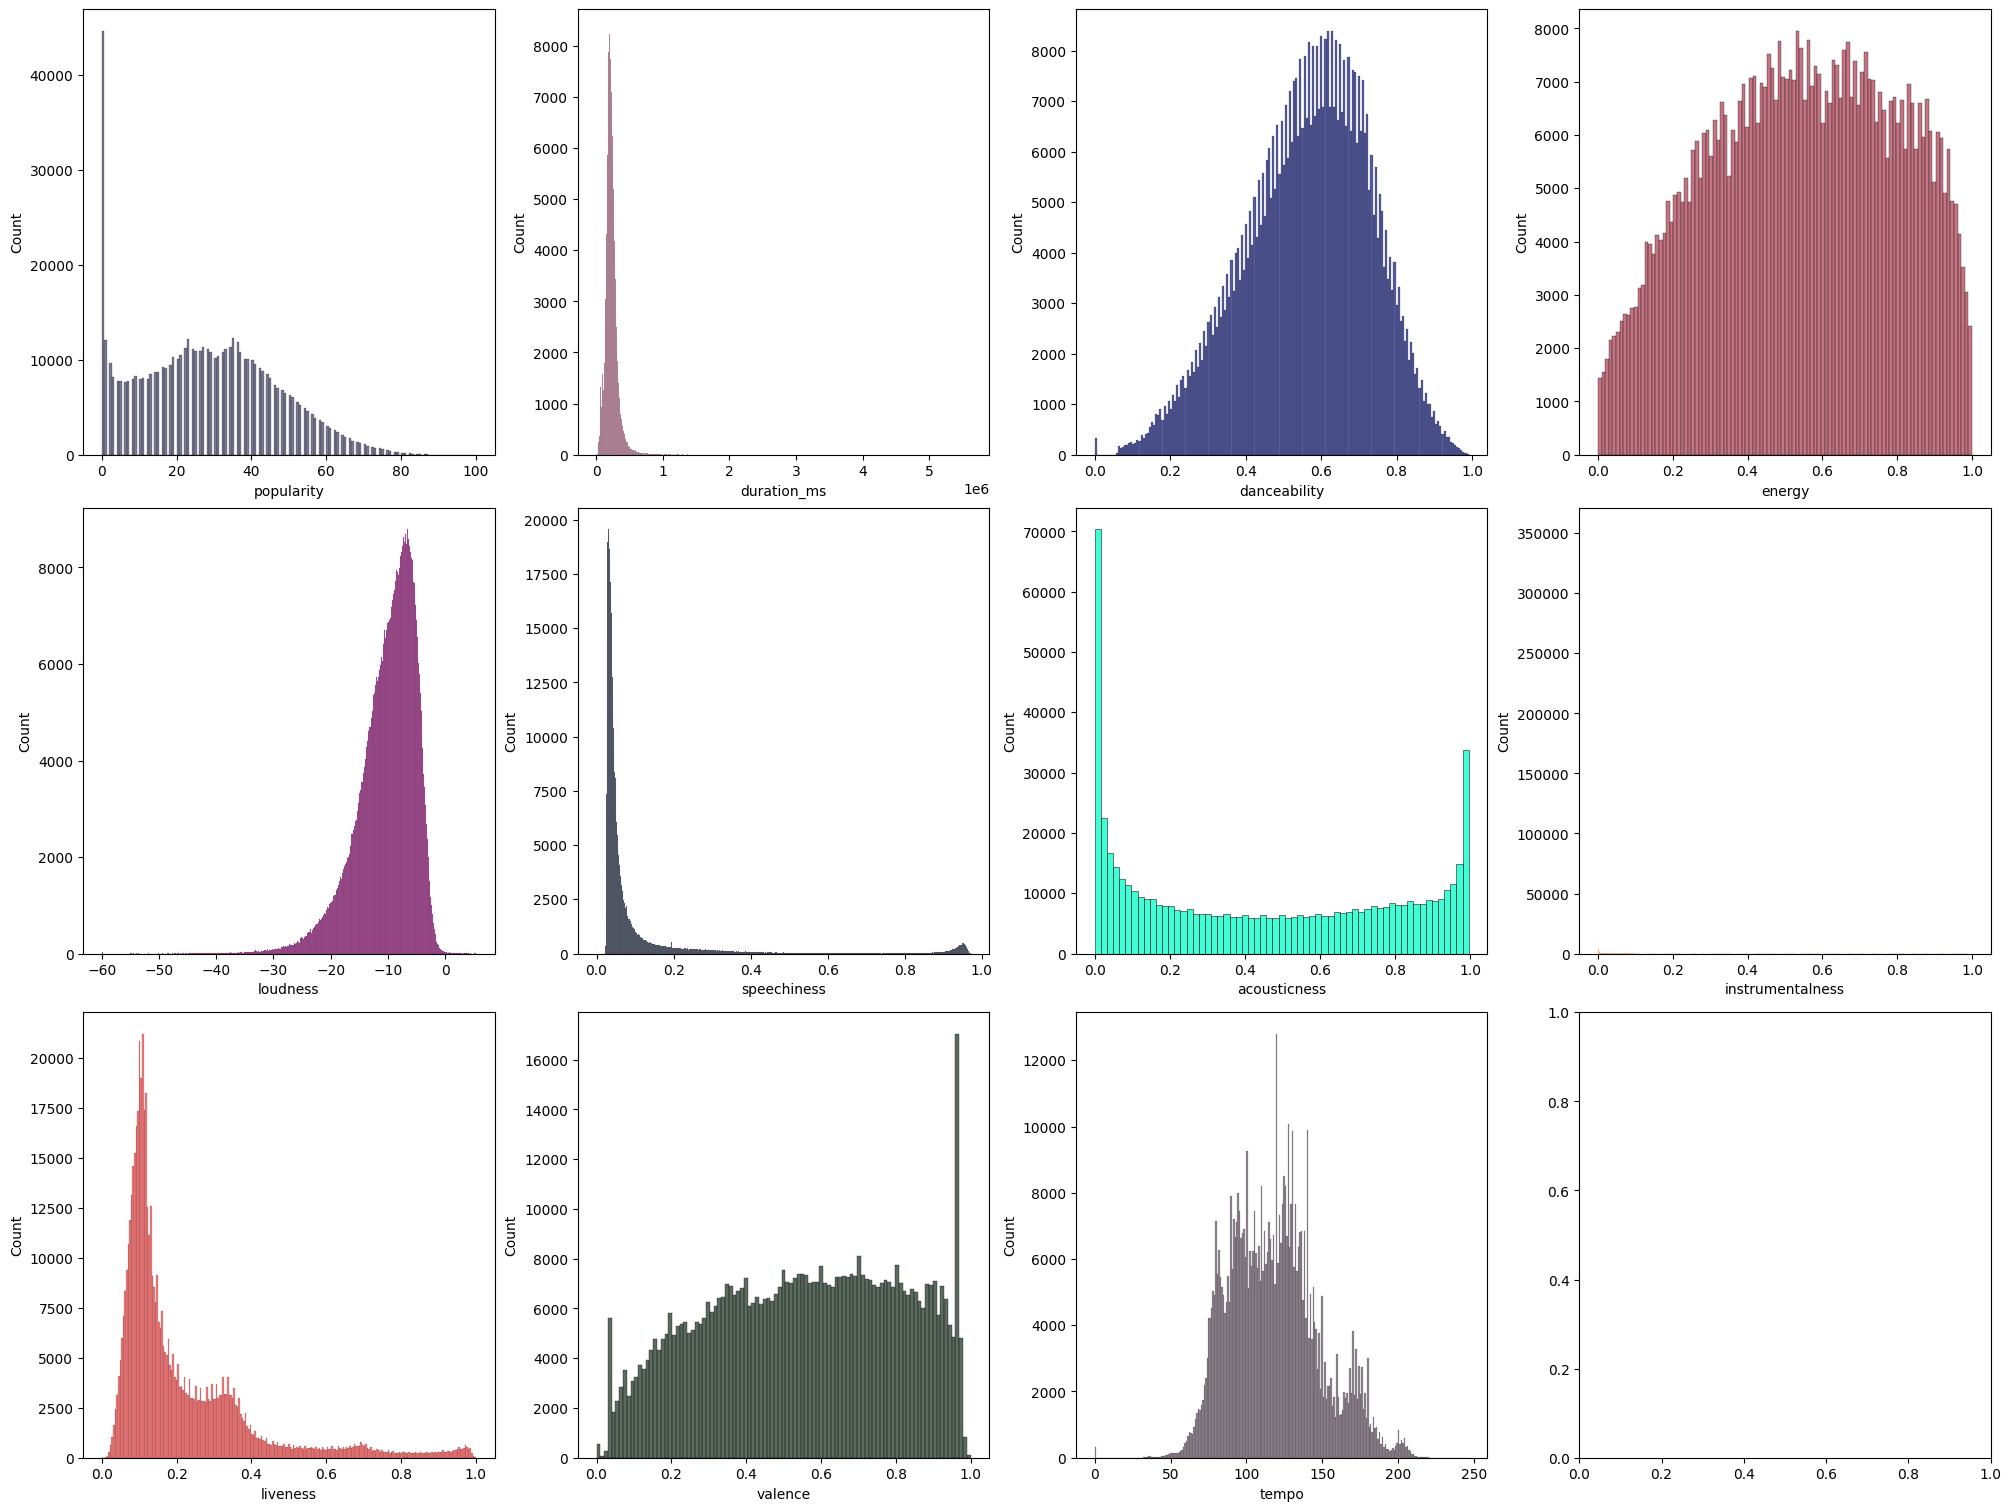

In [33]:
fig, axs = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(20,15))
sns.histplot(ax=axs[0][0],x=df["popularity"],color="#4C4C6D")
sns.histplot(ax=axs[0][1],x=df["duration_ms"],color="#99627A")
sns.histplot(ax=axs[0][2],x=df["danceability"],color="#1D267D")
sns.histplot(ax=axs[0][3],x=df["energy"],color="#B04759")
sns.histplot(ax=axs[1][0],x=df["loudness"],color="#8B1874")
sns.histplot(ax=axs[1][1],x=df["speechiness"],color="#212A3E")
sns.histplot(ax=axs[1][2],x=df["acousticness"],color="#00FFCA")
sns.histplot(ax=axs[1][3],x=df["instrumentalness"],color="#F6BA6F")
sns.histplot(ax=axs[2][0],x=df["liveness"],color="#F45050")
sns.histplot(ax=axs[2][1],x=df["valence"],color="#263A29")
sns.histplot(ax=axs[2][2],x=df["tempo"],color="#6D5D6E")
# sns.histplot(ax=axs[2][3],x=df["track_age_FLAG"],color="#B2A4FF")
plt.show()

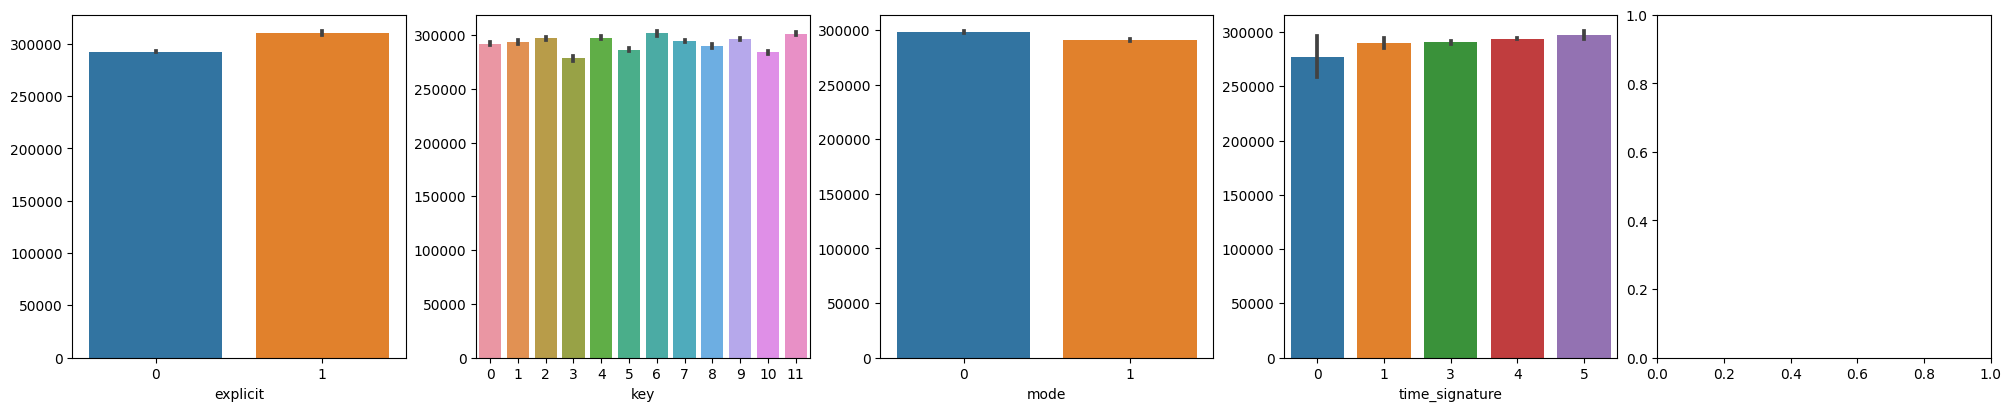

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=5, constrained_layout=True, figsize=(20,4))
sns.barplot(ax=axs[0],x=df["explicit"],y=df["explicit"].index)
sns.barplot(ax=axs[1],x=df["key"],y=df["key"].index)
sns.barplot(ax=axs[2],x=df["mode"],y=df["mode"].index)
sns.barplot(ax=axs[3],x=df["time_signature"],y=df["time_signature"].index)
# sns.barplot(ax=axs[4],x=df["era_FLAG"],y=df["era_FLAG"].index)
plt.show()

applying scaller and one hot encoding

In [22]:
def grab_col_names(dataframe, cat_th=13, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [23]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

In [24]:
cat_but_car

['id', 'name', 'artists', 'id_artists', 'release_date']

In [10]:
# df_model = df.drop(cat_but_car,axis=1)

In [11]:
# df_model.head(10)

In [25]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [26]:
ohe_cols = ["key","explicit","mode","time_signature"]
df_model=one_hot_encoder(df,ohe_cols,drop_first=True)

In [27]:
df_model.head(10)

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,-13.338,...,0,0,0,0,0,1,0,1,0,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,-22.136,...,0,0,0,0,0,1,1,0,0,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,-21.180,...,0,0,0,0,0,1,0,0,0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,-27.961,...,0,0,0,0,0,1,0,1,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,-16.900,...,0,0,0,0,0,0,0,0,1,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,-12.343,...,0,0,0,0,0,1,0,0,1,0
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,-12.833,...,0,0,0,0,0,1,0,0,0,1
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,-13.757,...,0,0,0,0,0,1,0,1,0,0
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,-16.222,...,0,0,0,0,0,0,0,0,1,0
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,-23.228,...,0,0,0,0,0,1,0,1,0,0


In [15]:
cat_cols_model, num_cols_model, cat_but_car_model=grab_col_names(df_model)

In [16]:
num_cols_model

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [17]:
cat_but_car_model

['id', 'name', 'artists', 'id_artists', 'release_date']

In [18]:
scaler = StandardScaler()
df_model[num_cols_model] = scaler.fit_transform(df_model[num_cols_model])

In [19]:
df_model.head(10)

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.17441,-0.815219,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.489991,-0.385340,-0.615436,...,0,0,0,0,0,1,0,1,0,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.50104,-1.042061,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791012,-1.107820,-2.344121,...,0,0,0,0,0,1,1,0,0,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.50104,-0.382627,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780318,-1.449212,-2.156280,...,0,0,0,0,0,1,0,0,0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.50104,-0.420032,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460626,-1.776312,-3.488653,...,0,0,0,0,0,1,0,1,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.50104,-0.529309,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972971,-1.524635,-1.315320,...,0,0,0,0,0,0,0,0,1,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,-1.50104,-0.404021,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-2.026545,-1.115759,-0.419932,...,0,0,0,0,0,1,0,0,1,0
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,-1.50104,-0.755440,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,-0.322766,-0.742610,-0.516211,...,0,0,0,0,0,1,0,0,0,1
7,0IA0Hju8CAgYfV1hwhidBH,La Java,-1.50104,-0.542372,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,-0.003684,-1.421424,-0.697764,...,0,0,0,0,0,1,0,1,0,0
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,-1.50104,0.632391,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,-0.455215,-0.266250,-1.182102,...,0,0,0,0,0,0,0,0,1,0
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,-1.50104,-0.386318,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,-0.093990,-1.996629,-2.558684,...,0,0,0,0,0,1,0,1,0,0


In [20]:
# Randomly pop a row
random_row = df_model.sample(n=1)
df_model = df_model.drop(random_row.index)

In [21]:
df_model.head(10)

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.17441,-0.815219,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.489991,-0.385340,-0.615436,...,0,0,0,0,0,1,0,1,0,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.50104,-1.042061,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791012,-1.107820,-2.344121,...,0,0,0,0,0,1,1,0,0,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.50104,-0.382627,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780318,-1.449212,-2.156280,...,0,0,0,0,0,1,0,0,0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.50104,-0.420032,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460626,-1.776312,-3.488653,...,0,0,0,0,0,1,0,1,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.50104,-0.529309,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972971,-1.524635,-1.315320,...,0,0,0,0,0,0,0,0,1,0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,-1.50104,-0.404021,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-2.026545,-1.115759,-0.419932,...,0,0,0,0,0,1,0,0,1,0
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,-1.50104,-0.755440,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,-0.322766,-0.742610,-0.516211,...,0,0,0,0,0,1,0,0,0,1
7,0IA0Hju8CAgYfV1hwhidBH,La Java,-1.50104,-0.542372,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,-0.003684,-1.421424,-0.697764,...,0,0,0,0,0,1,0,1,0,0
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,-1.50104,0.632391,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,-0.455215,-0.266250,-1.182102,...,0,0,0,0,0,0,0,0,1,0
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,-1.50104,-0.386318,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,-0.093990,-1.996629,-2.558684,...,0,0,0,0,0,1,0,1,0,0


In [48]:
df_model.shape

(586600, 28)

In [49]:
divisor = 586600
start = 1
end = 1000000

divisible_numbers = []

for num in range(start, end+1):
    if num % divisor == 0:
        divisible_numbers.append(num)

print("Numbers divisible by", divisor, ":")
print(divisible_numbers)


Numbers divisible by 586600 :
[586600]


In [186]:
cols_to_cluster = cat_cols_model + num_cols_model
cols_to_cluster

['key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'explicit_1',
 'mode_1',
 'time_signature_1',
 'time_signature_3',
 'time_signature_4',
 'time_signature_5',
 'popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [170]:
kmeans = KMeans(n_clusters=100, random_state=17)
# kmeans.get_params()
predicted = kmeans.fit_predict(df_model[cols_to_cluster])
# predicted

100%|██████████| 10/10 [05:01<00:00, 30.15s/it]


In [171]:
predicted.shape

(586600,)

In [172]:
kmeans.cluster_centers_

array([[ 0.04705695,  0.13686393,  0.02951029, ..., -0.25591994,
        -0.90045175,  1.24573528],
       [ 0.08107221,  0.08884026,  0.02013129, ...,  0.74737439,
         0.94235638, -0.14663227],
       [ 0.04306274,  0.12907578,  0.04205082, ..., -0.36788411,
         0.73732443, -0.24972819],
       ...,
       [ 0.16508746,  0.10003644,  0.02004373, ...,  0.52810014,
         0.1571009 , -1.12776176],
       [ 0.09559662,  0.09012092,  0.02349989, ..., -0.38516669,
         0.41293642,  0.07347379],
       [ 0.20714286,  0.05714286,  0.04285714, ...,  0.75549675,
        -0.9537538 , -0.13200636]])

In [173]:
df_model['cluster']=predicted
df_model.head(10)

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,cluster
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.17441,-0.815219,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.489991,-0.385340,-0.615436,...,0,0,0,0,1,0,1,0,0,90
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.50104,-1.042061,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791012,-1.107820,-2.344121,...,0,0,0,0,1,1,0,0,0,32
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.50104,-0.382627,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780318,-1.449212,-2.156280,...,0,0,0,0,1,0,0,0,1,79
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.50104,-0.420032,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460626,-1.776312,-3.488653,...,0,0,0,0,1,0,1,0,0,69
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.50104,-0.529309,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972971,-1.524635,-1.315320,...,0,0,0,0,0,0,0,1,0,3
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,-1.50104,-0.404021,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-2.026545,-1.115759,-0.419932,...,0,0,0,0,1,0,0,1,0,3
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,-1.50104,-0.755440,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,-0.322766,-0.742610,-0.516211,...,0,0,0,0,1,0,0,0,1,30
7,0IA0Hju8CAgYfV1hwhidBH,La Java,-1.50104,-0.542372,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,-0.003684,-1.421424,-0.697764,...,0,0,0,0,1,0,1,0,0,59
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,-1.50104,0.632391,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,-0.455215,-0.266250,-1.182102,...,0,0,0,0,0,0,0,1,0,23
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,-1.50104,-0.386318,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,-0.093990,-1.996629,-2.558684,...,0,0,0,0,1,0,1,0,0,19


In [29]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# Generate a sample dataset
# X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Number of clusters
# K = 4

# # Initialize and fit the K-means model
# kmeans = KMeans(n_clusters=K)
# kmeans.fit(df_model)

# Target point
target_point = df_model.sample(10)
target_point
# target_list = [target_point["id"] , target_point["name"]]
# print(target_list)
# target_point

# Get the cluster label for the target point
# target_label = kmeans.predict([target_point])[0]

# Get the indices of points in the target cluster
# target_cluster_indices = np.where(kmeans.labels_ == target_label)[0]




,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
544969,0v8GGC6w8fO69kTOZwDAHP,Suveöös,-0.412273,-0.127413,['NEXUS'],['2C79klpEJtG3RU6ORcKaj7'],2003-10-15,1.368972,1.154892,1.143508,...,0,0,0,0,1,1,0,0,1,0
112974,1BR5vhAlaoUiijQ28p6jlN,Backseat Freestyle,1.710823,-0.137528,['Kendrick Lamar'],['2YZyLoL8N0Wb9xBt1NhZWg'],2012-10-22,-0.106031,0.432412,0.511805,...,0,0,0,0,1,1,0,0,1,0
529645,4M36kNFgfTRfssVd7EsAmA,Mujh Mein Tu,1.003124,0.262566,['Keerthi Sagathia'],['0ESWSdsAB8QDp2eA4ES2Er'],2013-01-10,0.164888,-0.091585,0.693162,...,0,0,0,0,0,1,0,0,1,0
585076,2MYRMbPlAmyeZbxPKmP53c,Pausa På Henne,1.329754,-0.491058,"['GG', 'Chiicoow']","['5NxuYq2W1QB6qpPxNYVumI', '22NLugApVLSLdESJh1...",2020-12-11,1.748259,0.495926,-0.140333,...,0,0,0,1,1,0,0,0,1,0
433092,4bKoCbveIKkAVdzj6h5jqX,Night Must Fall,-0.085643,0.921597,['Hoodoo Gurus'],['7HZQqtnOYmjJl8XAB3Vg8y'],1996,-0.238480,1.202528,0.514949,...,0,0,0,1,0,0,0,0,1,0
489175,3nEMOM72N08uGXpTbCZ1ta,Dreamland,-0.466712,-0.439111,['Bob Marley & The Wailers'],['2QsynagSdAqZj3U9HgDzjD'],1971,-0.009704,-0.853761,-0.619759,...,0,0,0,0,0,1,0,0,1,0
31685,7HVFWgrWwN63YLAjo0QBPz,Rhythm-A-Ning,0.513179,1.638352,"['Art Blakey & The Jazz Messengers', 'Thelonio...","['6ykfXAed2KOLOMI3R0TZdz', '4PDpGtF16XpqvXxsrF...",1958,-0.112051,-0.087615,-0.144655,...,0,0,0,0,0,0,0,0,1,0
182812,6kxHMpVt9OYDQOwXYJrQAb,Touch The Fire,0.567617,-0.028252,['ICEHOUSE'],['3IUisqn0mluZR0LITs8Sqk'],1987-09-21,-0.148174,1.639191,1.219941,...,0,0,0,0,0,1,0,0,1,0
551606,0b2sbKBIRpmr3bzStpbBiG,雨の終わる場所,-0.684465,0.369431,['DREAMS COME TRUE'],['2mJOGcLR3aCHkM1uAF93or'],1993,0.562236,-0.111433,-0.287108,...,0,1,0,0,0,0,0,0,1,0
353257,4KdSFxOOIhx02NvXur4JDp,Timber,-1.392164,-0.320248,['Odetta'],['2wkz8hACugzAvF0voupg3H'],1956,-0.112051,-0.754519,0.473883,...,0,0,0,0,0,0,0,0,1,0


In [191]:
cluster = target_point["cluster"]
cluster.values[0]

75

In [33]:
target_point = df_model[df_model["id"] == "503sFkc8Y2eyGnM6cu8kHm"]
target_point

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
70621,503sFkc8Y2eyGnM6cu8kHm,It's Your Love,61,227333,"['Tim McGraw', 'Faith Hill']","['6roFdX1y5BYSbp60OTJWMd', '25NQNriVT2YbSW80IL...",1997-06-03,0.474,0.528,-8.588,...,0,0,0,0,0,1,0,0,1,0


In [30]:
df_model[df_model["id"] == "2UFmTI7g4aLgpWmaCcTEvI"]


,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_8,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
415961,2UFmTI7g4aLgpWmaCcTEvI,我要給世界最悠長的濕吻,1.384192,0.077997,['Tanya Chua'],['376pcuw4IgWBMOUwCr8kIm'],2018-12-21,-0.280623,-0.059827,0.598652,...,0,0,0,0,0,1,0,0,1,0


In [217]:
# Calculate the distances between the target point and points in the target cluster
distances = cdist(target_point[cols_to_cluster], X[cols_to_cluster])

distances[0]
# Find the index of the nearest point
nearest_index = np.argsort(distances[0])
# nearest_index
# # # Retrieve the nearest point
# nearest_point = X[nearest_index]
nearest_row= X.iloc[nearest_index]
nearest_row[:10]
# print("Nearest Point:", nearest_point)

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,loudness,...,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,cluster
415961,2UFmTI7g4aLgpWmaCcTEvI,我要給世界最悠長的濕吻,1.384192,0.077997,['Tanya Chua'],['376pcuw4IgWBMOUwCr8kIm'],2018-12-21,-0.280623,-0.059827,0.598652,...,0,0,0,0,1,0,0,1,0,84
236291,2eNZsRS82lFb82XM4Yp9ju,He Intentado Tanto Tanto,1.329754,-0.015189,['Los Temerarios'],['3YbOSxo85kla7RID8ugnW3'],2000-06-01,-0.045827,0.372867,0.580379,...,0,0,0,0,1,0,0,1,0,84
560917,3HxJaKzob7tdcr4qmqfR1d,蝶々結び,1.384192,0.594930,['Aimer'],['0bAsR2unSRpn6BQPEnNlZm'],2016-09-21,-0.322766,-0.167008,0.551495,...,0,0,0,0,1,0,0,1,0,84
397084,5gsvZaXWEFjAo1j4pqbr9t,Come Musica,1.057562,0.001360,['Jovanotti'],['7tmMPdOmFvdRvbj2aWoiRi'],2008-01-18,-0.196337,0.186292,0.409239,...,0,0,0,0,1,0,0,1,0,84
70621,503sFkc8Y2eyGnM6cu8kHm,It's Your Love,1.819699,-0.021511,"['Tim McGraw', 'Faith Hill']","['6roFdX1y5BYSbp60OTJWMd', '25NQNriVT2YbSW80IL...",1997-06-03,-0.539501,-0.055858,0.317873,...,0,0,0,0,1,0,0,1,0,84
405018,2OYTFaOB4D1bWLXaT5mrfH,I Swear This Time I Mean It,1.166439,0.087346,['Mayday Parade'],['3WfJ1OtrWI7RViX9DMyEGy'],2009-10-05,-0.846543,0.023536,0.680586,...,0,0,0,0,1,0,0,1,0,84
46893,2gVfoOOLlCPOYIQZFIwb97,Out The Blue - Remastered 2010,1.003124,-0.216133,['John Lennon'],['4x1nvY2FN8jxqAFA0DA02H'],1973-10-29,-0.334807,0.007657,0.372300,...,0,0,0,0,1,0,0,1,0,84
278809,6Flllj0iIJPwXUpxL9KdxC,蝶々結び,1.057562,0.594930,['Aimer'],['0bAsR2unSRpn6BQPEnNlZm'],2016,-0.322766,-0.167008,0.551495,...,0,0,0,0,1,0,0,1,0,84
379055,5XCeCprrLZHLHHmKxYOXq1,A la faveur de l'automne,1.220877,-0.050168,['Tété'],['0eykNIBJy8E8Cyd00Y5fqx'],2003-09-10,0.170909,-0.429006,0.591775,...,0,0,0,0,1,0,0,1,0,84
70996,3YvbKPUuXXUtbnmcEcYGpp,Aún Estoy de Pie,1.384192,0.082920,['José José'],['4mN0qcMxWX8oToqfDPM5yV'],1997-11-04,-0.798379,0.222019,0.579593,...,0,0,0,0,1,0,0,1,0,84


In [72]:
target_point

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_9,key_10,key_11,explicit_1,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,cluster
353697,-0.956657,-0.664293,0.869277,-0.238462,-0.05997,-0.362808,0.708682,-0.424959,0.11429,1.326074,...,0,0,0,0,0,0,0,1,0,51


In [185]:
df_model.to_csv("clustered_tracks.csv" , index = False)

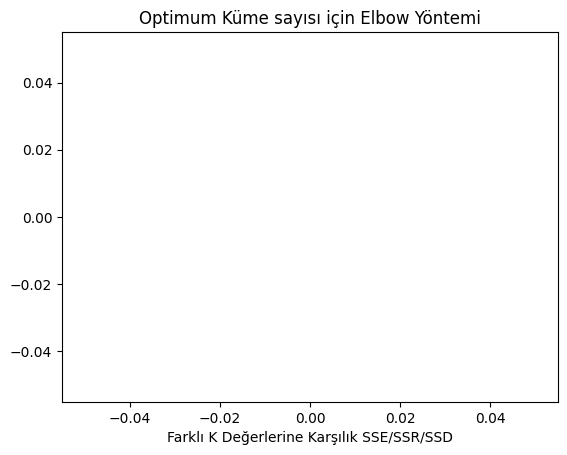

In [26]:
kmeans = KMeans()
ssd = []
K = range(1, 0)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_model)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show(block=True)

In [27]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_model)
elbow.show()

NameError: name 'KElbowVisualizer' is not defined